#TODO
*cross check the implementation by some one expert

#heling material
https://github.com/ivashnyov/ODIR/issues/1  
https://github.com/nnnnew/ODIR  
https://github.com/DecentMakeover/odir_winningsubmission

# read data from directory

In [2]:
#connect drive with colab notebook
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#show content in working directory
ls

drive/  sample_data/


In [0]:
#cd drive/My\ Drive/ghina/thesis

#extract data

In [0]:
import pandas as pd

In [6]:
#following are libraries to unpack 7z file
!pip install patool 
!pip install pyunpack
from pyunpack import Archive

     |████████████████████████████████| 81kB 2.3MB/s 
  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=302466633106d205ce09f908a4a89c4aea8af7c9f12ee185a21880cd805db335
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
#create a folder name as data
!mkdir data

In [0]:
#path where our data is saved
path='/content/drive/My Drive/ghina/thesis/'

In [0]:
#extract the 7z file in data folder we created above
#this not only extract the data but move it from drive to colab for efficinet processing
#it will take some time
Archive(path+'ODIR-5K_Training_Images.7z').extractall('data')

In [0]:
#read the annottion file
annotation=pd.read_excel(path+'ODIR-5K_Training_Annotations(Updated)_V2.xlsx')

In [0]:
#normal (N), diabetes (D), glaucoma (G), cataract (C), AMD (A), hypertension (H), myopia (M) and other diseases/abnormalities (O) 

In [12]:
#print first 5 rows of annotation file
annotation.head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
8,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
9,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1


In [13]:
annotation['Left-Diagnostic Keywords'].value_counts().head(30)

normal fundus                                                      1433
moderate non proliferative retinopathy                              366
mild nonproliferative retinopathy                                   220
cataract                                                            135
pathological myopia                                                 111
lens dust，normal fundus                                             110
glaucoma                                                            104
dry age-related macular degeneration                                 93
severe nonproliferative retinopathy                                  70
drusen                                                               66
epiretinal membrane                                                  54
hypertensive retinopathy                                             53
macular epiretinal membrane                                          49
normal fundus，lens dust                                         

In [14]:
annotation['Right-Diagnostic Keywords'].value_counts().head(30)

normal fundus                                                      1383
moderate non proliferative retinopathy                              379
mild nonproliferative retinopathy                                   240
cataract                                                            127
pathological myopia                                                 116
lens dust，normal fundus                                             112
dry age-related macular degeneration                                103
glaucoma                                                             96
severe nonproliferative retinopathy                                  74
drusen                                                               72
macular epiretinal membrane                                          71
epiretinal membrane                                                  55
hypertensive retinopathy                                             51
myelinated nerve fibers                                         

#read single image

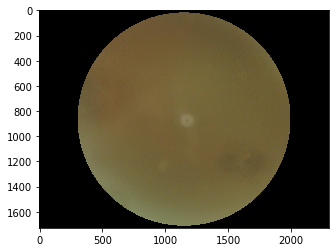

In [15]:
#read a single image from data and display it
import cv2 #for reading images
import matplotlib.pyplot as plt # for displaying images

image=cv2.imread('data/ODIR-5K_Training_Dataset/0_left.jpg')
#cv2 read image in BGR format, and plt displaying image in RGB format. SO we need to convert BGR2RGB
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
plt.imshow(image) #display image


## Auto crop image

In [0]:
#https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


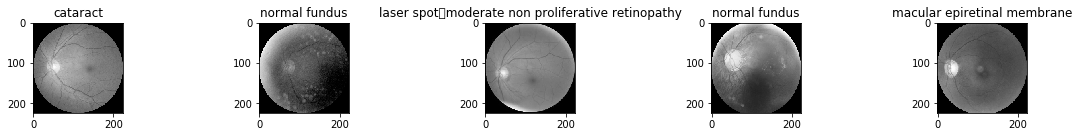

In [17]:
import numpy as np
fig,ax=plt.subplots(1,5,figsize=(15,15))
for i,j in zip(range(0,5),annotation['Left-Diagnostic Keywords']):
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}_left.jpg'.format(i+1))
  #cv2 read image in BGR format, and plt displaying image in RGB format. SO we need to convert BGR2RGB
  
  image = crop_image_from_gray(image)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (224, 224))
  #image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX=15) ,-4 ,128)
  ax[i].imshow(image,cmap='gray') #display image
  ax[i].title.set_text(j)
  fig.tight_layout()


In [18]:
#now read all image in left fundus column
for img_file,disease in zip(annotation['Left-Fundus'],annotation['Left-Diagnostic Keywords'])	:
  print(img_file,disease)
  break

0_left.jpg cataract


#read all images

In [0]:
#create  list where we can store image , 
#this will take some time
left_images=[]
for img_file in (annotation['Left-Fundus'])	:
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}'.format(img_file))#read image
  image = crop_image_from_gray(image)
  image = cv2.resize(image, (224, 224))
  image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX=10) ,-4 ,128)
  left_images.append(image)#append image in above create list of images
  

In [0]:
#create  list where we can store image , 
#this will take some time
right_images=[]
for img_file in (annotation['Right-Fundus'])	:
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}'.format(img_file))#read image
  image = crop_image_from_gray(image)
  image = cv2.resize(image, (224, 224))
  image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX=10) ,-4 ,128)
  right_images.append(image)#append image in above create list of images
  

In [21]:
left_images[0].shape

(224, 224, 3)

In [0]:
labels=annotation.iloc[:,-8::]

In [23]:
labels.head()

,N,D,G,C,A,H,M,O
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


In [0]:
#conver the images list to array so we can feed it to neural net
import numpy as np
XL=np.array(left_images)
XR=np.array(right_images)
y=np.array(labels)

In [25]:
XL.shape,XR.shape,y.shape

((3500, 224, 224, 3), (3500, 224, 224, 3), (3500, 8))

#split data

In [0]:
# #save variables in drive, so next we can load them directly
# np.save(path+'X.npy',X)
# np.save(path+'y.npy',y)

In [0]:
#split data
from sklearn.model_selection import train_test_split
XL_train, XL_val, yL_train, yL_val = train_test_split(XL, y, test_size=0.2, random_state=42)
XR_train, XR_val, yR_train, yR_val = train_test_split(XR, y, test_size=0.2, random_state=42)

In [28]:
len(yL_val),len(yR_val)

(700, 700)

In [29]:
sum(XL_val==XR_val).any()

True

In [30]:
sum(yL_val==yR_val)

array([700, 700, 700, 700, 700, 700, 700, 700])

#Date generator

In [0]:
BATCH_SIZE=32

In [32]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               vertical_flip=False,
                               fill_mode='nearest'# Fill in missing pixels with the nearest filled value
                                )
val_datagen=ImageDataGenerator(rescale=1/255)

Using TensorFlow backend.


In [0]:
def multi_train_gen(gen,XR_train,XL_train,yR_train,yL_train):
  XR_generator = train_datagen.flow(XR_train, yR_train, batch_size=BATCH_SIZE)
  XL_generator = train_datagen.flow(XL_train, yL_train, batch_size=BATCH_SIZE)
  while True:
    X1i = XR_generator.next()
    X2i = XL_generator.next()
    yield [X1i[0], X2i[0]], X2i[1] 

In [0]:
input_gen=multi_train_gen(train_datagen,XR_train,XL_train,yR_train,yL_train)    

In [0]:
def multi_val_gen(gen,XR_val,XL_val,yR_val,yL_val):
  vR_generator = val_datagen.flow(XR_val, yR_val, batch_size=BATCH_SIZE)
  vL_generator = val_datagen.flow(XL_val, yL_val, batch_size=BATCH_SIZE)

  while True:
    X1i = vR_generator.next()
    X2i = vL_generator.next()
    yield [X1i[0], X2i[0]], X2i[1] 

In [0]:
val_gen=multi_val_gen(val_datagen,XR_val,XL_val,yR_val,yL_val)    

In [0]:
#steps_train = XR_generator.n//XR_generator.batch_size
#steps_valid = vR_generator.n//vR_generator.batch_size


In [37]:
steps_train=(len(XL_train)/BATCH_SIZE)
steps_train

87.5

In [38]:
steps_valid=(len(XL_val)/BATCH_SIZE)
steps_valid

21.875

#RESNET 50

following idea is borrowed from following link. 
https://github.com/nnnnew/ODIR/blob/master/train/2_pretrained_model_and_1_classifier.ipynb  
Data Generator is combined with multiinput model .
Thanks to https://github.com/keras-team/keras/issues/8130#issuecomment-336855177  
default input size for resent is `224x224`  
https://keras.io/applications/#resnet

In [0]:
from keras.models import Sequential,Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input
from keras.layers import GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [0]:
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost

In [0]:
@tf.function
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

In [42]:
import keras
left_input=Input(shape=XL.shape[1::])
right_input=Input(shape=XR.shape[1::])

left_model = ResNet50(include_top=False,input_tensor=left_input)
for layer in left_model.layers:
        layer.name = layer.name + '_left'
        layer.trainable = True


right_model = ResNet50(include_top=False,input_tensor=right_input)
for layer in right_model.layers:
        layer.name = layer.name + '_right'
        layer.trainable = True


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step


In [0]:

x = keras.layers.concatenate([left_model.output, right_model.output])
x=  keras.layers.Conv2D(64,3,activation='relu')(x)
x=  keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(512)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dense(512)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dropout(0.2)(x)
out = keras.layers.Dense(8, activation='sigmoid')(x)
model = keras.models.Model(inputs=[left_input, right_input], outputs=out)
#https://www.kaggle.com/xhlulu/aptos-2019-densenet-keras-starter

In [0]:
from keras.optimizers import Adam,RMSprop
opt = RMSprop(lr=1e-3,decay=0.2)
model.compile(optimizer=opt, loss=macro_soft_f1, metrics=[macro_f1])
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['macro_f1'])
#https://github.com/ashrefm/multi-label-soft-f1/blob/master/Multi-Label%20Image%20Classification%20in%20TensorFlow%202.0.ipynb

In [0]:
mc=ModelCheckpoint('mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')


In [46]:
history=model.fit_generator(generator=input_gen,
                        steps_per_epoch=steps_train,
                        validation_data=val_gen,
                        validation_steps=steps_valid,
                        epochs=30,
                        class_weight=[0.5,0.5,1.5,1.5,1.5,1.5,1.5,0.7],
                        callbacks=[mc]
                        )

Epoch 1/30
88/87 [==============================] - 81s 918ms/step - loss: 0.7341 - macro_f1: 0.2864 - val_loss: 0.7170 - val_macro_f1: 0.3257
Epoch 2/30
88/87 [==============================] - 53s 606ms/step - loss: 0.6716 - macro_f1: 0.3677 - val_loss: 0.7003 - val_macro_f1: 0.3474
Epoch 3/30
88/87 [==============================] - 57s 647ms/step - loss: 0.6487 - macro_f1: 0.3842 - val_loss: 0.6781 - val_macro_f1: 0.3511
Epoch 4/30
88/87 [==============================] - 57s 645ms/step - loss: 0.6411 - macro_f1: 0.3921 - val_loss: 0.6540 - val_macro_f1: 0.3743
Epoch 5/30
88/87 [==============================] - 56s 640ms/step - loss: 0.6187 - macro_f1: 0.4128 - val_loss: 0.6482 - val_macro_f1: 0.3807
Epoch 6/30
88/87 [==============================] - 57s 650ms/step - loss: 0.6208 - macro_f1: 0.4094 - val_loss: 0.6479 - val_macro_f1: 0.3795
Epoch 7/30
88/87 [==============================] - 57s 644ms/step - loss: 0.6149 - macro_f1: 0.4108 - val_loss: 0.6386 - val_macro_f1: 0.3855

In [0]:

y_pred = model.predict_generator(val_gen,steps=steps_valid)

In [48]:
y_pred.shape,yL_val.shape

((700, 8), (700, 8))

In [0]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0
y_pred=y_pred.astype(int)

normal (N), diabetes (D), glaucoma (G), cataract (C), AMD (A), hypertension (H), myopia (M) and other diseases/abnormalities (O) 

In [0]:
lab=['N','D','G','C','A','H','M','O']

In [51]:
from sklearn.metrics import confusion_matrix,f1_score
f=np.zeros(8)
for i,j in zip(range(8),lab):
  f1=f1_score(yL_val[:,i],y_pred[:,i])
  f[i]=f1
  print(j, ":",f1 )

N : 0.415929203539823
D : 0.4069400630914827
G : 0.1333333333333333
C : 0.07619047619047618
A : 0.03773584905660377
H : 0.10138248847926268
M : 0.03076923076923077
O : 0.35752212389380533


In [52]:
f.sum()/len(f)

0.1949753460442522

In [0]:
keras.backend.clear_session()